

# Project: Investigate a Dataset ( Medical Appointments)
> **Dataset**: This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.
● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the
location of the hospital.
● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.
● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction

**Questions**
1. Number of male and female in gender column?
2. What number showed and did not show up for appointment ?
3. Is there a relationship between age and  appointment?
4. What is the average  wait time between ScheduledDay and AppointmentDay?
5. Is there a relationship between age and hypertension?

In [92]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline



## Data Wrangling

### General Properties

In [93]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('../Dataset/KaggleV2-May-2016.csv')
#   types and look for instances of missing or possibly errant data.


In [94]:
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [95]:
df.tail(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [96]:
print('number of rows are:', df.shape[0]) 
print('number of columns are:', df.shape[1])

number of rows are: 110527
number of columns are: 14


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


After visualy inspecting the data
1. The PatientId and AppointmentID are just number that won't contribute to the analysis
2. Also the ScheduledDay and AppointmentDay are in the object dtype
3. drop null avlues if present
5. drop duplicated values if present
6. Rename the hipertension column to hypertension

### Data Cleaning

In [98]:
# check for number of null values in each column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

They are no null values in each columns above

In [99]:
#check  for duplicates
print(f'They are {df.duplicated().sum()} duplicated values')

They are 0 duplicated values


In [100]:
#Drops PatientId and AppointmentID columns
df=df.drop(['PatientId', 'AppointmentID'], axis=1)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [101]:
#convert both  AppointmentDay and ScheduledDay to date time
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

In [102]:
#renames the column from Hipertension to Hypertension
df.rename(columns={'Hipertension' : 'Hypertension'}, inplace=True)
df.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No



## Exploratory Data Analysis



### 1. Number of male and female in gender column

In [103]:
female =df['Gender'].value_counts()[0]
male =df['Gender'].value_counts()[1]
print(f'They are {female} female and {male} male')

They are 71840 female and 38687 male


Text(0.5, 0, 'Gender')

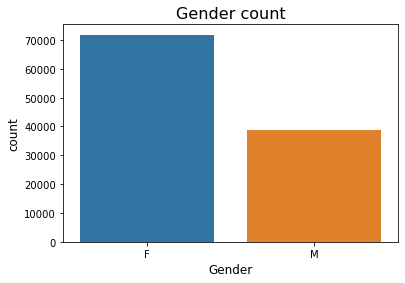

In [104]:
data=df['Gender'].value_counts()
sns.barplot(x=data.index, y=data.values )
plt.title('Gender count', fontsize=16)
plt.ylabel('count', fontsize=12)
plt.xlabel('Gender', fontsize=12)

In [105]:
print(f'They are more female to male with in {round(71840/(71840+38687)*100)}% to {round(38687/(71840+38687)*100)}')

They are more female to male with in 65% to 35


### 2. What number showed and did not show up for appointment 

In [106]:
no =df['No-show'].value_counts()[0]
yes =df['No-show'].value_counts()[1]
print(f'{no} showed up for appointement while {yes} didnt show up')

88208 showed up for appointement while 22319 didnt show up


Text(0.5, 0, 'appointment')

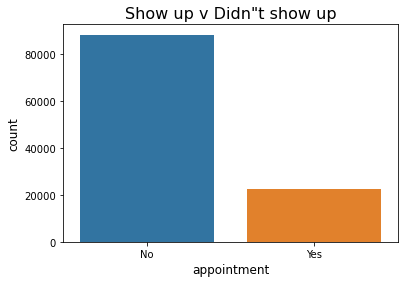

In [107]:
data=df['No-show'].value_counts()
sns.barplot(x=data.index, y=data.values )
plt.title('Show up v Didn"t show up', fontsize=16)
plt.ylabel('count', fontsize=12)
plt.xlabel('appointment', fontsize=12)

88208 showed up for appointement while 22319 didnt show up

### 3. Is there a relationship between age and keeping appointment?

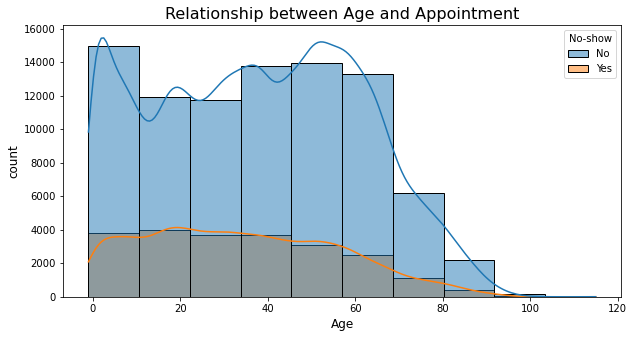

In [108]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x= 'Age', bins=10, kde=True, color ='navy', hue = 'No-show')
plt.title('Relationship between Age and Appointment', fontsize=16)
plt.ylabel('count', fontsize=12)
plt.xlabel('Age', fontsize=12);

Those at Younger age tends to default on appointment

### 4. What is the average  wait time between ScheduledDay and AppointmentDay

In [109]:
wait_time=abs(df['AppointmentDay'].dt.day - df['ScheduledDay'].dt.day).mean()
print(f'The average wait time between ScheduledDay and AppointmentDay is {round(wait_time)} days')

The average wait time between ScheduledDay and AppointmentDay is 7 days


### 5. Is there a relationship between age and hypertension

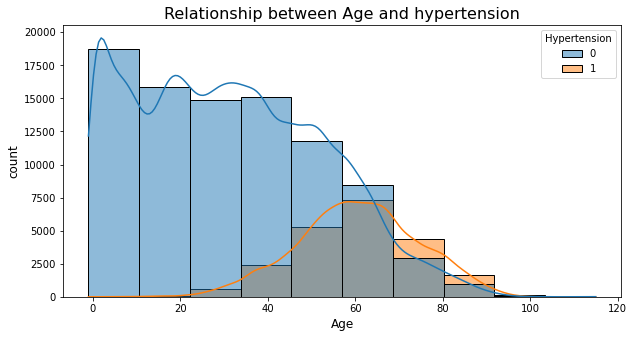

In [110]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x= 'Age', bins=10, kde=True, color ='navy', hue = 'Hypertension')
plt.title('Relationship between Age and hypertension', fontsize=16)
plt.ylabel('count', fontsize=12)
plt.xlabel('Age', fontsize=12);

Hypertension tends to increase from the age of 40 and above

## Conclusions
**Result**
- They are 71840 female and 38687 male
- 88208 showed up for appointement while 22319 didnt show up
- Those at Younger age tends to default on appointment
- The average wait time  between ScheduledDay and AppointmentDay is 10 days 00 hours 36 minutes and 34 seconds
- Older ages tends to be more hypertensive

**Limitiation**
- Data about Level and ownwership of hospital might be need, appointment with private hospital tend to be expensive and well manage. Appointment with a tertiary hostpital tend to deal with serious condition. all this might contribute signifcantlly to keeping appointment.


**Refrence**: NA


In [112]:
!jupyter nbconvert --to html medical_appointment.ipynb

[NbConvertApp] Converting notebook medical_appointment.ipynb to html
[NbConvertApp] Writing 707389 bytes to medical_appointment.html
